# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
I am going to run some simple EDA on the data generated from the API Calls file in this repository. Specifically, I am going to look at budget and revenue data per certification

In [2]:
y_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
y_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
df = pd.concat([y_2000,y_2001])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.112,2222.0,PG


In [3]:
df = df[['imdb_id','budget','revenue','certification']]
df.fillna(0,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 1335
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        2575 non-null   object 
 1   budget         2575 non-null   float64
 2   revenue        2575 non-null   float64
 3   certification  2575 non-null   object 
dtypes: float64(2), object(2)
memory usage: 100.6+ KB


## How many movies had at least some valid financial information?

In [4]:
df.loc[(df['budget'] > 0) | (df['revenue'] > 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 1 to 1312
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        639 non-null    object 
 1   budget         639 non-null    float64
 2   revenue        639 non-null    float64
 3   certification  639 non-null    object 
dtypes: float64(2), object(2)
memory usage: 25.0+ KB


639 movies have at least some valid financial information, where budget or revenue are greater than 0

For the rest of the analysis, I will remove any records with 0 for budget AND revenue

In [5]:
df = df.loc[(df['budget'] > 0) & (df['revenue'] > 0)]
df.describe()

,budget,revenue
count,3.550000e+02,3.550000e+02
mean,3.416698e+07,7.825426e+07
std,3.201734e+07,1.209048e+08
min,4.000000e+00,1.000000e+00
25%,1.000000e+07,8.486668e+06
50%,2.400000e+07,3.160000e+07
75%,5.000000e+07,9.405184e+07
max,1.400000e+08,9.764756e+08


## How many movies are there in each certification category?

<AxesSubplot: xlabel='count', ylabel='certification'>

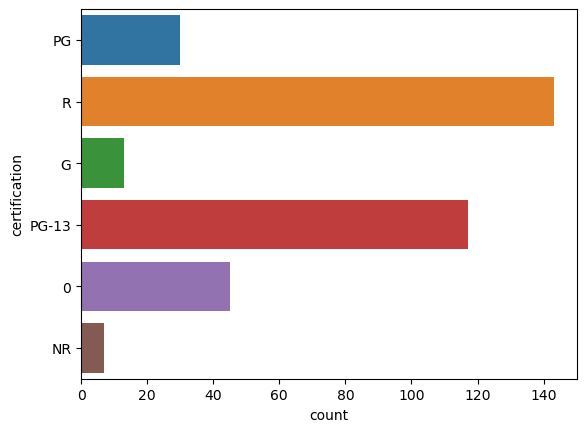

In [6]:
sns.countplot(data = df, y = 'certification')

In [7]:
df.groupby('certification')['imdb_id'].count()

certification
0         45
G         13
NR         7
PG        30
PG-13    117
R        143
Name: imdb_id, dtype: int64

Most movies are rated R, with PG-13 following after. The lowest rating is NR

## What is the average revenue per certification category?

<AxesSubplot: xlabel='revenue', ylabel='certification'>

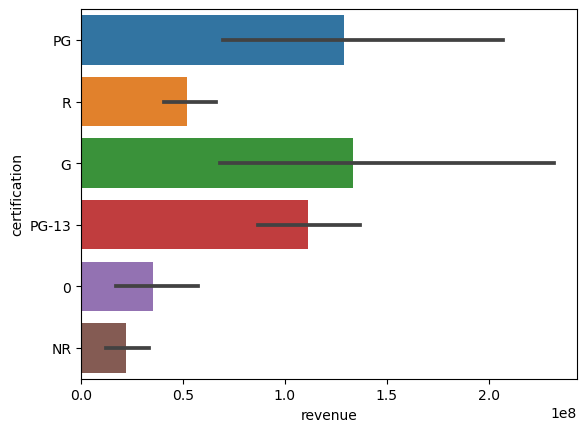

In [8]:
sns.barplot(data = df, y = 'certification', x = 'revenue')

In [9]:
df.groupby('certification')['revenue'].mean()

certification
0        3.502553e+07
G        1.332169e+08
NR       2.212257e+07
PG       1.291256e+08
PG-13    1.111018e+08
R        5.206124e+07
Name: revenue, dtype: float64

Rated G has the most average revenue, followed closely by PG and PG-13. NR is the lowest budget

What is the average budget per certification category?

<AxesSubplot: xlabel='budget', ylabel='certification'>

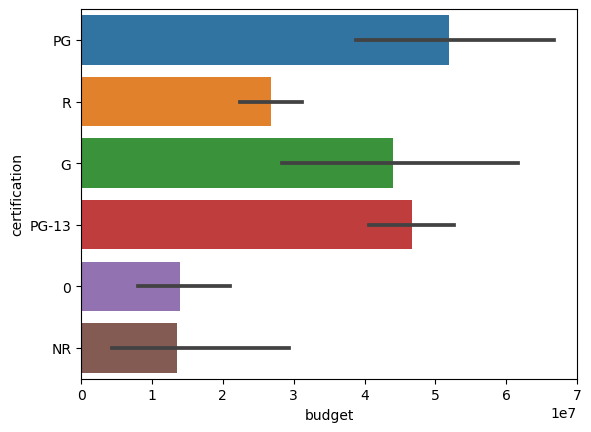

In [10]:
sns.barplot(data = df, y = 'certification', x = 'budget')

In [11]:
df.groupby('certification')['budget'].mean()

certification
0        1.391820e+07
G        4.400000e+07
NR       1.352857e+07
PG       5.197491e+07
PG-13    4.662733e+07
R        2.672457e+07
Name: budget, dtype: float64

PG has the highest average budget, while PG-13 and G follow closely, NR has the lowest average budget